# APPLICATION OF DIGITAL IMAGE PROCESSING TECHNOLOGY TO DETECT DISEASES IN COCOA PLANTS

In [ ]:
!pip install cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2


In [ ]:
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import matplotlib.image as mpimg
import matplotlib.patches as patches
import pylab as pl
from PIL import Image
import cv2 as cv
import splitfolders
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
os.chdir('/content/drive/MyDrive/Enfermedades Cacao')

In [ ]:
#os.chdir('C:\\Users\\kenso\\Documents\\Python')

In [ ]:
directory = '/content/drive/MyDrive/Enfermedades Cacao'

In [ ]:
input_folder = '/content/drive/MyDrive/Enfermedades Cacao'

In [ ]:
Name=[]
for file in os.listdir(directory):
    Name+=[file]
print(Name)
print(len(Name))

['Monilia', 'Fito', 'Sana', 'cocoa image']
4


In [ ]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N))
reverse_mapping=dict(zip(N,Name))

def mapper(value):
    return reverse_mapping[value]

In [ ]:
dataset=[]
datafile=[]
datapath=[]
boxset=[]
boxfile=[]
boxpath=[]

count=0
for file in os.listdir(directory):
    path=os.path.join(directory,file)
    for im in os.listdir(path):
        if im[-4:]=='.jpg':
            image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(100,100))
            image=img_to_array(image)
            image=image/255.0
            dataset.append([image,count])
            datafile.append(im)
            bx=im[0:-4]+'.txt'
            boxfile.append(bx)
            dtpath=os.path.join(path,im)
            datapath.append(dtpath)
            bxpath=os.path.join(path,bx)
            bxdata=np.loadtxt(bxpath)
            boxpath.append(bxpath)
            boxset.append(bxdata)
    count=count+1

In [ ]:
n_sana=0
n_monilia=0
n_fito=0
for i in range(len(dataset)):
    sp=dataset[i][1]
    if sp==0:
        n_sana+=1
    elif sp==1:
        n_monilia+=1
    elif sp==2:
        n_fito+=1

print(n_fito,n_monilia,n_sana)
print(len(dataset))

13 0 1
14


In [ ]:
dataset


[[array([[[0.89411765, 0.8862745 , 0.8352941 ],
          [0.8901961 , 0.88235295, 0.7921569 ],
          [0.8901961 , 0.87058824, 0.75686276],
          ...,
          [0.19215687, 0.19607843, 0.1764706 ],
          [0.18431373, 0.1882353 , 0.16862746],
          [0.19607843, 0.19607843, 0.1882353 ]],
  
         [[0.9019608 , 0.8862745 , 0.7490196 ],
          [0.90588236, 0.8901961 , 0.74509805],
          [0.90588236, 0.8901961 , 0.7137255 ],
          ...,
          [0.19607843, 0.2       , 0.18039216],
          [0.2       , 0.20392157, 0.18431373],
          [0.1882353 , 0.19215687, 0.17254902]],
  
         [[0.81960785, 0.78431374, 0.56078434],
          [0.827451  , 0.78431374, 0.5411765 ],
          [0.8392157 , 0.78431374, 0.5294118 ],
          ...,
          [0.18431373, 0.1882353 , 0.16862746],
          [0.18431373, 0.1882353 , 0.16862746],
          [0.1882353 , 0.19215687, 0.17254902]],
  
         ...,
  
         [[1.        , 1.        , 1.        ],
          [1. 


## <br> Image preprocessing <br>

In [ ]:
def draw_bbox2(num0):
    img0=datapath[num0]
    box0=boxset[num0]
    count=dataset[num0][1]
    name=mapper(count)
    im=Image.open(img0)
    W,H=im.size
    print(box0)
    _ = plt.figure(figsize = (8,8))
    _ = plt.axis('on')
    _ = plt.imshow(mpimg.imread(img0))
    ax=plt.gca()
    ax.text(W*0.05,H*0.05,f'{name}',fontsize=30,color='yellow')
    ax.text(W*0.05,H*0.10,f'#0',fontsize=20,color='red')
    ax.text(W*0.05,H*0.15,f'#1',fontsize=20,color='blue')
    ax.text(W*0.05,H*0.20,f'#2',fontsize=20,color='yellow')

    if type(box0[0])==np.float64:
        mk,x0,y0,w0,h0=box0
        x=(x0-w0/2)*W
        y=(y0-h0/2)*H
        w=w0*W
        h=h0*H
        if mk==0:
            rect=patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='red',fill = False)
        elif mk==1:
            rect=patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='blue',fill = False)
        elif mk>1:
            rect=patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='yellow',fill = False)
        ax.add_patch(rect)
        plt.show
    else:
        for item in box0:
            mk,x0,y0,w0,h0=item
            x=(x0-w0/2)*W
            y=(y0-h0/2)*H
            w=w0*W
            h=h0*H
            if mk==0:
                rect=patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='red',fill = False)
            elif mk==1:
                rect=patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='blue',fill = False)
            elif mk>1:
                rect=patches.Rectangle((x,y),w,h,linewidth=2,edgecolor='yellow',fill = False)
            ax.add_patch(rect)
            plt.show

[[2.       0.599679 0.653365 0.158974 0.232692]
 [2.       0.695192 0.340865 0.148718 0.219712]
 [2.       0.126923 0.541466 0.171795 0.277644]
 [2.       0.560417 0.932091 0.152885 0.130048]
 [2.       0.789103 0.533774 0.033333 0.054567]]


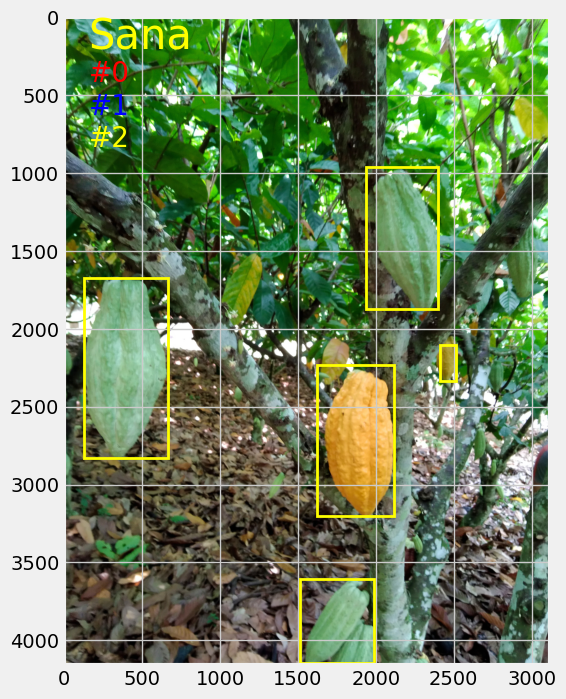

In [ ]:
draw_bbox2(13)

[2.       0.534936 0.611899 0.224359 0.289663]


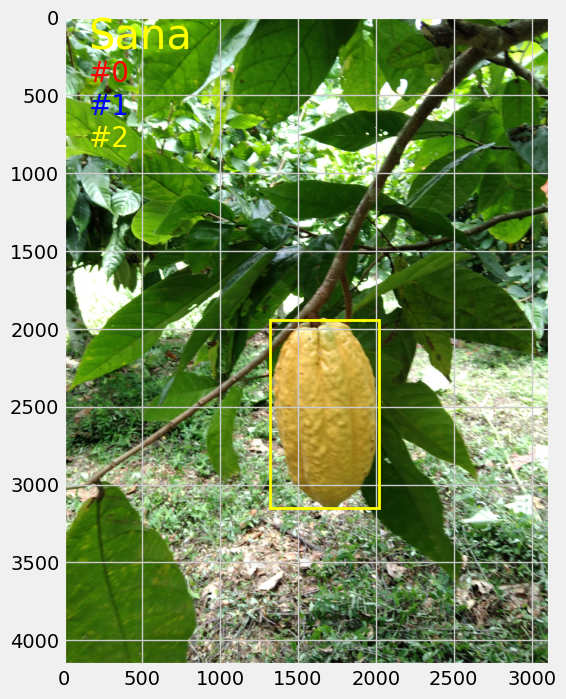

In [ ]:
draw_bbox2(12)

[[2.       0.255929 0.617909 0.147115 0.294952]
 [2.       0.446635 0.649639 0.275321 0.469952]
 [2.       0.735897 0.486779 0.311538 0.463462]
 [2.       0.043269 0.701923 0.085897 0.216346]]


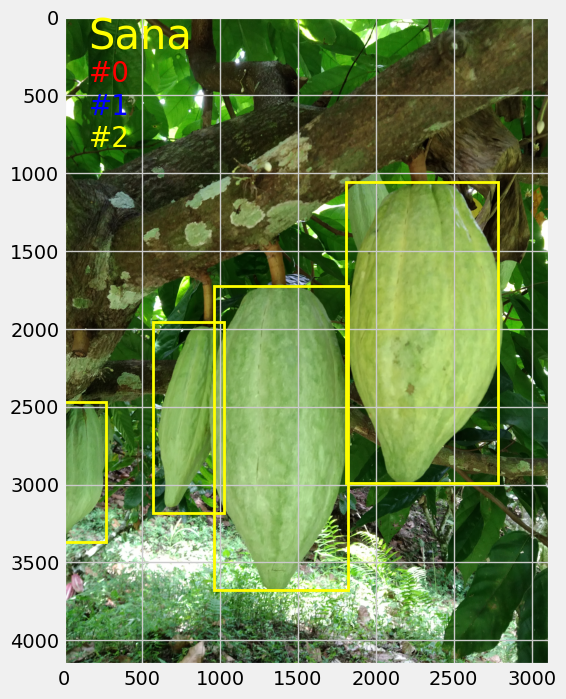

In [ ]:
draw_bbox2(11)

In [ ]:
draw_bbox2(1)

[[2.       0.517308 0.409736 0.235897 0.311298]
 [2.       0.445994 0.522837 0.215705 0.364904]
 [2.       0.171314 0.697115 0.220192 0.29375 ]]


In [ ]:
draw_bbox2(2)

[[2.       0.592468 0.584014 0.2375   0.386779]
 [2.       0.783974 0.502043 0.180769 0.246875]
 [2.       0.36875  0.698678 0.227244 0.378125]
 [2.       0.156731 0.699279 0.234615 0.328846]
 [2.       0.879487 0.56226  0.123718 0.148558]]


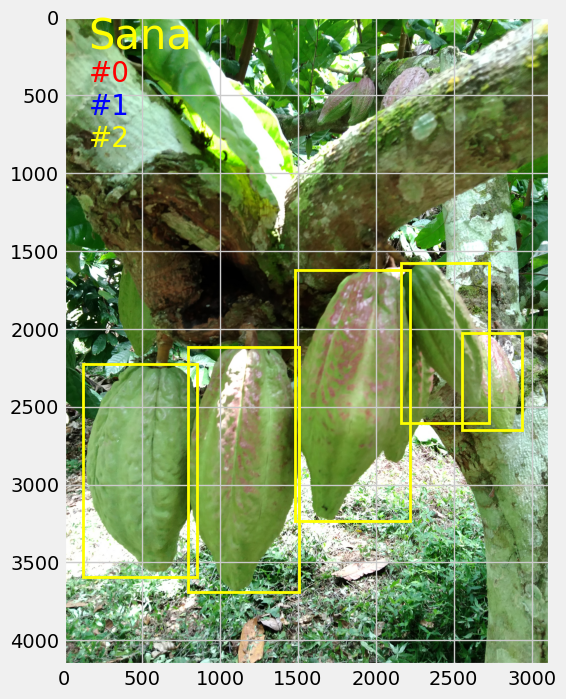

In [ ]:
draw_bbox2(10)

In [ ]:
draw_bbox2(9)

In [ ]:
draw_bbox2(13)

[[2.       0.517308 0.409736 0.235897 0.311298]
 [2.       0.445994 0.522837 0.215705 0.364904]
 [2.       0.171314 0.697115 0.220192 0.29375 ]]


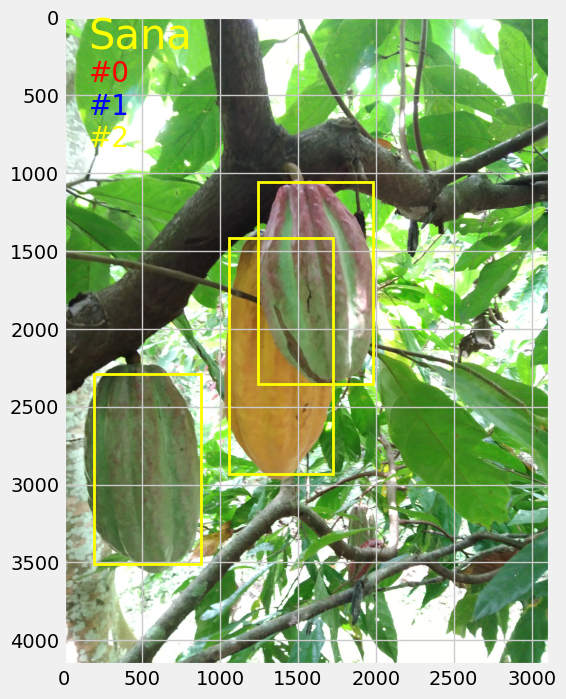

In [ ]:
draw_bbox2(1)

In [ ]:
draw_bbox2(7)

[[2.       0.742468 0.518029 0.126603 0.204327]
 [2.       0.607692 0.545312 0.142949 0.254567]
 [2.       0.909295 0.456731 0.041026 0.047115]]


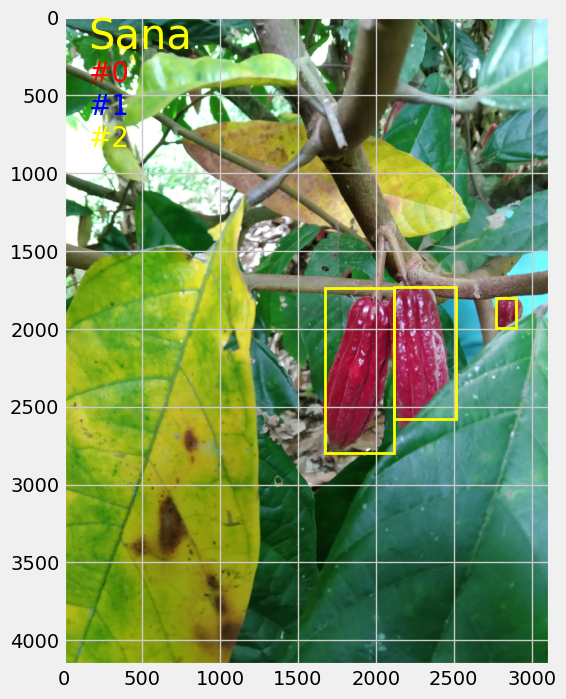

In [ ]:
draw_bbox2(5)

In [ ]:
draw_bbox2(1)

In [ ]:
draw_bbox2(100)

In [ ]:
draw_bbox2(70)

In [ ]:
draw_bbox2(99)

In [ ]:
draw_bbox2(98)

In [ ]:
draw_bbox2(97)

In [ ]:
draw_bbox2(96)

In [ ]:
draw_bbox2(95)

In [ ]:
draw_bbox2(94)

In [ ]:
draw_bbox2(93)

In [ ]:
draw_bbox2(310)

In [ ]:
draw_bbox2(280)

In [ ]:
draw_bbox2(155)

In [ ]:
draw_bbox2(178)

In [ ]:
draw_bbox2(245)

In [ ]:
draw_bbox2(240)

In [ ]:
draw_bbox2(300)

In [ ]:
draw_bbox2(201)

In [ ]:
draw_bbox2(199)

In [ ]:
draw_bbox2(176)

In [ ]:
draw_bbox2(133)

In [ ]:
draw_bbox2(66)

In [ ]:
draw_bbox2(287)

In [ ]:
draw_bbox2(6)

In [ ]:
draw_bbox2(23)

In [ ]:
draw_bbox2(277)

In [ ]:
draw_bbox2(122)

In [ ]:
draw_bbox2(299)

In [ ]:
draw_bbox2(199)

In [ ]:
draw_bbox2(213)

In [ ]:
draw_bbox2(11)

In [ ]:
draw_bbox2(6)

In [ ]:
draw_bbox2(9)

In [ ]:
draw_bbox2(4)

In [ ]:
draw_bbox2(3)

In [ ]:
draw_bbox2(2)

In [ ]:
draw_bbox2(110)

In [ ]:
splitfolders.ratio(input_folder, output = "cocoa image", seed =42, ratio =(.7, .2, .1), group_prefix = None)